In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

In [2]:
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv(r"C:\Users\moham\Downloads\archive (2)\data.csv")

In [4]:
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            710 non-null    object
 1   Competition       710 non-null    object
 2   Matchday          710 non-null    object
 3   Date              710 non-null    object
 4   Venue             710 non-null    object
 5   Club              710 non-null    object
 6   Opponent          710 non-null    object
 7   Result            710 non-null    object
 8   Playing_Position  652 non-null    object
 9   Minute            710 non-null    object
 10  At_score          710 non-null    object
 11  Type              695 non-null    object
 12  Goal_assist       464 non-null    object
dtypes: object(13)
memory usage: 72.2+ KB


In [6]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Season,21
Competition,17
Matchday,52
Date,468
Venue,2
Club,5
Opponent,129
Result,57
Playing_Position,6
Minute,106


In [7]:
df.describe(include=['object']).T

,count,unique,top,freq
Season,710,21,14/15,61
Competition,710,17,LaLiga,311
Matchday,710,52,Group Stage,75
Date,710,468,09-12-15,5
Venue,710,2,H,404
Club,710,5,Real Madrid,450
Opponent,710,129,Sevilla FC,27
Result,710,57,3:00,49
Playing_Position,652,5,LW,356
Minute,710,106,90,17


In [8]:
px.histogram(
    df,
    x='Competition',
    title="Goals per competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Club'])

In [9]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,103
Serie A,81
Copa del Rey,22
FA Cup,13
Saudi Pro League,9
FIFA Club World Cup,7
EFL Cup,4
Supercopa,4


In [10]:
px.histogram(
    df,
    x='Season',
    title="Goals per season",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Season','Club'])


In [11]:
px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Seasons",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Season',
    hover_name='Season',
    hover_data=['Competition','Season','Club'])

In [12]:
px.histogram(
    df,
    x='Club',
    title="Goals per Clubs - Competition",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Competition',
    hover_name='Competition',
    hover_data=['Competition','Season','Club'])

In [13]:
px.histogram(
    df,
    x='Playing_Position',
    title="Goals per playing Position",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

In [14]:
px.histogram(
    df,
    x='Type',
    title="Goals per Type",
    log_x=False,
    log_y=False,
    #symbol='title',
    #markers=True,
    #width=800, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

<Axes: title={'center': 'Goals per venue'}, ylabel='Venue'>

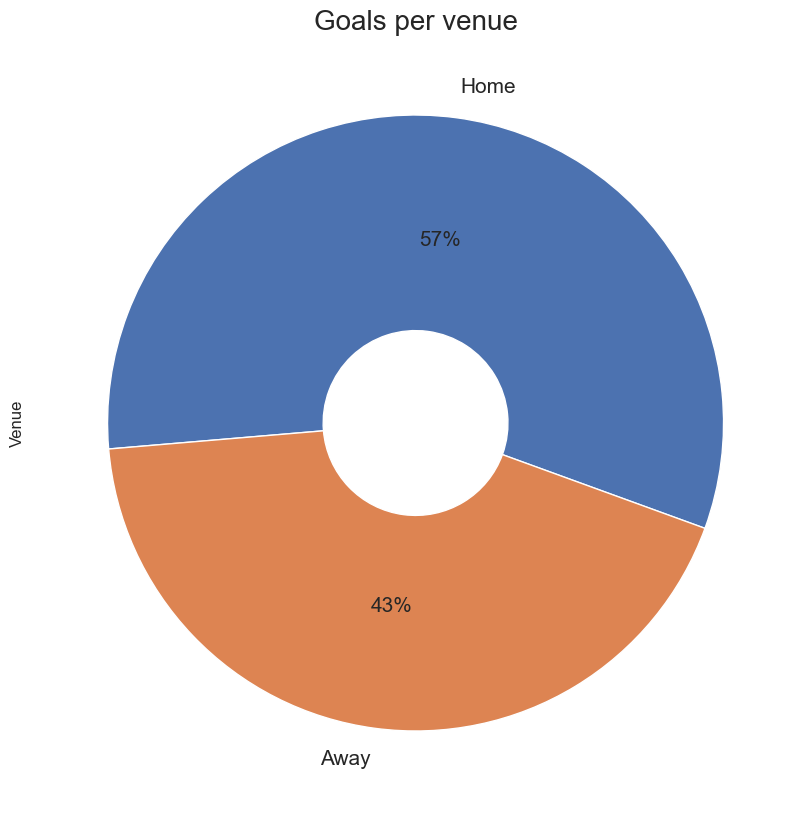

In [17]:
plt.figure(figsize=(30,10))
plt.title('Goals per venue', fontsize=20)
df.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})